(1920, 1080, 3)


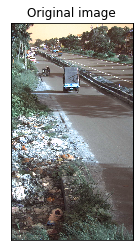

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load the image
img = cv2.imread("1.jpg")
print(img.shape)
plt.title('Original image')
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()


In [56]:
#cv2.imshow('original_img',img)
per=50
width= int( (img.shape[1]*per) / 100)
height= int ((img.shape[0]*per) /100 )
dim=(width, height)
img = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
print(img.shape)
image=img
#cv2.imshow('Resized_img',img)
# Apply log transform
#c= 255/ (np.log(1+np.max(img)))


(960, 540, 3)


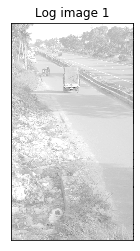

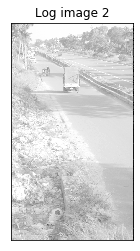

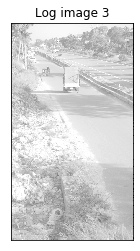

In [57]:
val= 0.8
img1,img2,img3= cv2.split(img)
img_log1 = (np.log(img1+val)/(np.log(1+np.max(img1))))*255
img_log1 = np.array(img_log1,dtype=np.uint8)
img_log2 = (np.log(img2+val)/(np.log(1+np.max(img2))))*255
img_log2 = np.array(img_log2,dtype=np.uint8)
img_log3 = (np.log(img3+val)/(np.log(1+np.max(img3))))*255
img_log3 = np.array(img_log3,dtype=np.uint8)
# Display the image
plt.title('Log image 1')
plt.imshow(img_log1, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
plt.title('Log image 2')
plt.imshow(img_log2, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
plt.title('Log image 3')
plt.imshow(img_log3, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

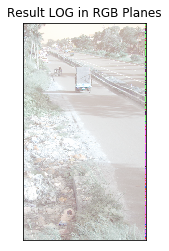

In [58]:

result_log=cv2.merge((img_log1,img_log2,img_log3))
plt.title('Result LOG in RGB Planes')
plt.imshow(result_log)
plt.xticks([]), plt.yticks([])
plt.show()

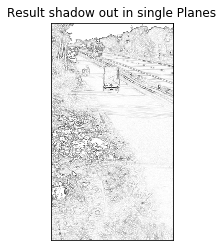

In [59]:
img = np.array(img,dtype=np.uint8)
img1,img2,img3= cv2.split(img)
kernel = np.ones((5,5), np.uint8)
dilated_img = cv2.dilate(img1, kernel, iterations = 1)
dilated_img = np.array(dilated_img,dtype=np.uint8)
bilateral = cv2.bilateralFilter(dilated_img, 9, 75, 75)
bilateral = np.array(bilateral,dtype=np.uint8)
#bg_img = cv2.medianBlur(img1, 5)
diff_img = 255 - cv2.absdiff(img1, bilateral )
plt.title('Result shadow out in single Planes')
plt.imshow(diff_img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

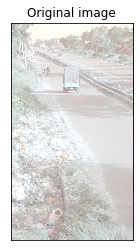

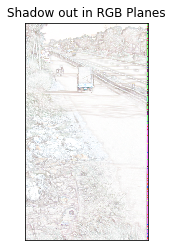

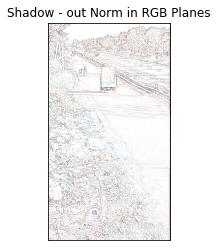

In [60]:
#img=image
img=result_log
plt.title('Original image')
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
img = np.array(img,dtype=np.uint8)
rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
kernel = np.ones((3,3), np.uint8)
arr = np.array([])
for plane in rgb_planes:

    dilated_img = cv2.dilate(plane, kernel, iterations = 5)
    dilated_img = np.array(dilated_img,dtype=np.uint8)
    bg_img = cv2.medianBlur(dilated_img, 21)
    bg_img  = np.array(bg_img ,dtype=np.uint8)
    bilateral = cv2.bilateralFilter(dilated_img, 9, 25, 25)
    bilateral = np.array(bilateral,dtype=np.uint8)
    diff_img = 255- cv2.absdiff(plane, bilateral)
    #diff_img = 255- cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img, arr, alpha=0, beta=  255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)

result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)

cv2.imwrite('shadows_out.png', result)
cv2.imwrite('shadows_out_norm.png', result_norm)
plt.title('Shadow out in RGB Planes')
plt.imshow(result, cmap= 'gray')
plt.xticks([]), plt.yticks([])
plt.show()
plt.title('Shadow - out Norm in RGB Planes')
plt.imshow(result_norm, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

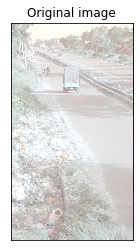

(960, 540, 3)


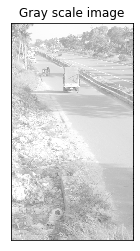

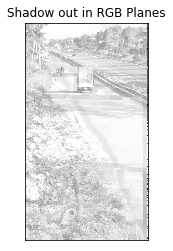

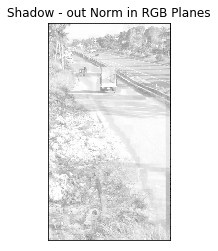

In [61]:
img=result_log
plt.title('Original image')
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
print(img.shape)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title('Gray scale image')
plt.imshow(img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

img = np.array(img,dtype=np.uint8)

kernel = np.ones((5,5), np.uint8)
arr = np.array([])


dilated_img = cv2.dilate(plane, kernel, iterations = 10)
dilated_img = np.array(dilated_img,dtype=np.uint8)
bg_img = cv2.medianBlur(dilated_img, 5)
bg_img  = np.array(bg_img ,dtype=np.uint8)
bilateral = cv2.bilateralFilter(dilated_img, 3, 75, 75)
bilateral = np.array(bilateral,dtype=np.uint8)
diff_img = 255 - cv2.absdiff(plane, bilateral)
#diff_img = 255 - cv2.absdiff(plane, bg_img)
norm_img = cv2.normalize(diff_img, arr, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)


cv2.imwrite('shadows_out_gray.png', diff_img) 
cv2.imwrite('shadows_out_norm_gray.png', norm_img)
plt.title('Shadow out in RGB Planes')
plt.imshow(diff_img, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
plt.title('Shadow - out Norm in RGB Planes')
plt.imshow(norm_img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [63]:
added = cv2.add(result_log, norm_img)
plt.imshow(added, cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()
#cv2.imshow("Added", added)

error: OpenCV(4.1.1) /io/opencv/modules/core/src/arithm.cpp:663: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [48]:
print(norm_img.shape)

(960, 540)


In [49]:
print(image.shape
     )

(960, 540, 3)


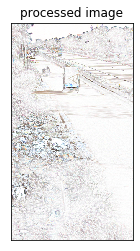

In [8]:
plt.title('processed image')
plt.imshow(result)
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
cv2.imshow('shadow out',result)
cv2.waitKey(0)